Este notebook mais para aprender como usar a API tsfresh que é uma poderosa ferramenta para estração de caracterísitcas de uma série temporal. Com ela podemos tanto extrair quando selecionar as melhores features rapidamente.

# TS-FRESH
## Feature extraction/selection automatically package for time series characteristics.
reference:https://tsfresh.readthedocs.io/en/latest/text/introduction.html.

+ What not to do with tsfresh?
    + For usage with streaming data
    + To train models on the features( we do note want to reinvent the wheel, check out the python package scitkit-learn for example_


# 1. Quick Start

In [1]:
!pip install tsfresh

  Using cached statsmodels-0.12.2-cp39-none-win_amd64.whl (9.4 MB)
  Using cached patsy-0.5.1-py2.py3-none-any.whl (231 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.17.0
    Uninstalling protobuf-3.17.0:
      Successfully uninstalled protobuf-3.17.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.5.0 requires numpy~=1.19.2, but you have numpy 1.20.2 which is incompatible.
You should consider upgrading via the 'c:\users\samue\miniconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures,\
    load_robot_execution_failures
download_robot_execution_failures()
timeseries,y = load_robot_execution_failures()

In [3]:
display(timeseries)
display(y)

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0
...,...,...,...,...,...,...,...,...
1315,88,10,-10,2,39,-21,-24,5
1316,88,11,-11,2,38,-24,-22,6
1317,88,12,-12,3,23,-24,-24,5
1318,88,13,-13,4,26,-29,-27,5


1      True
2      True
3      True
4      True
5      True
      ...  
84    False
85    False
86    False
87    False
88    False
Length: 88, dtype: bool

In [4]:
type(y)

pandas.core.series.Series

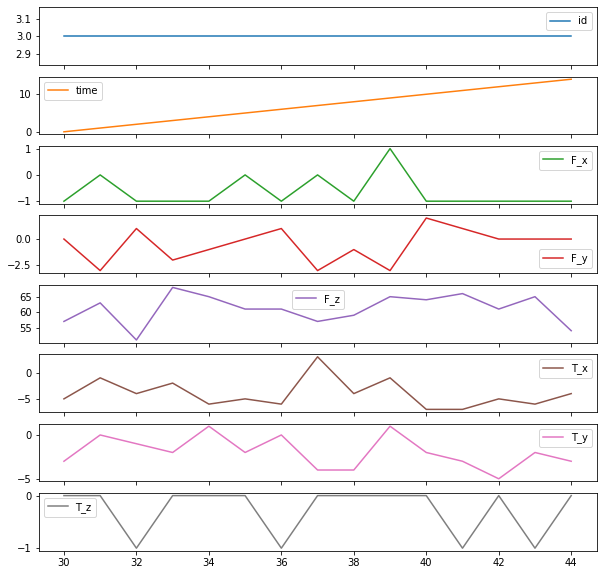

In [5]:
import matplotlib.pyplot as plt
timeseries[timeseries['id']==3].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

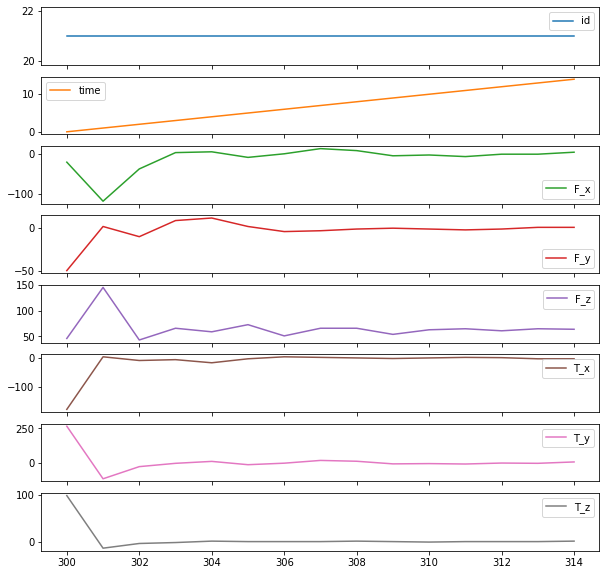

In [6]:
timeseries[timeseries['id']==21].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

For this, tsfresh come into place. It allow us to automatically extract over 1200 features from those six different time series for each robot.

For exctrating all features, we do:

In [7]:
from tsfresh import extract_features
extracted_features = extract_features(timeseries,column_id='id',column_sort='time')

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 30/30 [00:12<00:00,  2.31it/s]


In [8]:
extracted_features

,F_x__variance_larger_than_standard_deviation,F_x__has_duplicate_max,F_x__has_duplicate_min,F_x__has_duplicate,F_x__sum_values,F_x__abs_energy,F_x__mean_abs_change,F_x__mean_change,F_x__mean_second_derivative_central,F_x__median,...,T_z__permutation_entropy__dimension_5__tau_1,T_z__permutation_entropy__dimension_6__tau_1,T_z__permutation_entropy__dimension_7__tau_1,T_z__query_similarity_count__query_None__threshold_0.0,"T_z__matrix_profile__feature_""min""__threshold_0.98","T_z__matrix_profile__feature_""max""__threshold_0.98","T_z__matrix_profile__feature_""mean""__threshold_0.98","T_z__matrix_profile__feature_""median""__threshold_0.98","T_z__matrix_profile__feature_""25""__threshold_0.98","T_z__matrix_profile__feature_""75""__threshold_0.98"
1,0.0,0.0,1.0,1.0,-14.0,14.0,0.142857,0.000000,-0.038462,-1.0,...,-0.000000,-0.000000,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,1.0,1.0,1.0,-13.0,25.0,1.000000,0.000000,-0.038462,-1.0,...,1.540306,1.748067,1.831020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,1.0,1.0,-10.0,12.0,0.714286,0.000000,-0.038462,-1.0,...,2.019815,2.163956,2.197225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,1.0,1.0,1.0,-6.0,16.0,1.214286,-0.071429,-0.038462,0.0,...,2.397895,2.302585,2.197225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.0,0.0,0.0,1.0,-9.0,17.0,0.928571,-0.071429,0.038462,-1.0,...,2.271869,2.302585,2.197225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1.0,1.0,0.0,1.0,-1073.0,96833.0,7.142857,-5.428571,-0.038462,-98.0,...,2.397895,2.302585,2.197225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,1.0,0.0,1.0,1.0,143.0,1683.0,1.357143,1.071429,0.076923,8.0,...,1.893788,2.163956,2.197225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,1.0,0.0,0.0,0.0,961.0,83497.0,9.071429,9.071429,0.807692,52.0,...,1.159589,1.227529,1.303092,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,1.0,1.0,0.0,1.0,4509.0,1405437.0,12.928571,12.214286,-1.038462,338.0,...,1.159589,1.497866,1.581094,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
extracted_features.columns

Index(['F_x__variance_larger_than_standard_deviation',
       'F_x__has_duplicate_max', 'F_x__has_duplicate_min',
       'F_x__has_duplicate', 'F_x__sum_values', 'F_x__abs_energy',
       'F_x__mean_abs_change', 'F_x__mean_change',
       'F_x__mean_second_derivative_central', 'F_x__median',
       ...
       'T_z__permutation_entropy__dimension_5__tau_1',
       'T_z__permutation_entropy__dimension_6__tau_1',
       'T_z__permutation_entropy__dimension_7__tau_1',
       'T_z__query_similarity_count__query_None__threshold_0.0',
       'T_z__matrix_profile__feature_"min"__threshold_0.98',
       'T_z__matrix_profile__feature_"max"__threshold_0.98',
       'T_z__matrix_profile__feature_"mean"__threshold_0.98',
       'T_z__matrix_profile__feature_"median"__threshold_0.98',
       'T_z__matrix_profile__feature_"25"__threshold_0.98',
       'T_z__matrix_profile__feature_"75"__threshold_0.98'],
      dtype='object', length=4722)

You end up with a DataFrame extracted_features with all more than 1200 different extracted features. We will now remove all NaN values (that were created by feature calculators, than can not be used on the given data, e.g. because it has too low statistics) and select only the relevant features next:

In [10]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

impute(extracted_features) # remove NaN with average/extreme
features_filtered = select_features(extracted_features,y) # Feature Selection
features_filtered

c:\users\samue\miniconda3\lib\site-packages\tsfresh\utilities\dataframe_functions.py:171: RuntimeWarning: The columns ['F_x__partial_autocorrelation__lag_7'
 'F_x__partial_autocorrelation__lag_8'
 'F_x__partial_autocorrelation__lag_9' ...
 'T_z__matrix_profile__feature_"median"__threshold_0.98'
 'T_z__matrix_profile__feature_"25"__threshold_0.98'
 'T_z__matrix_profile__feature_"75"__threshold_0.98'] did not have any finite values. Filling with zeros.
  warnings.warn("The columns {} did not have any finite values. Filling with zeros.".format(


,F_x__value_count__value_-1,F_x__abs_energy,F_x__root_mean_square,F_x__range_count__max_1__min_-1,F_y__abs_energy,F_y__root_mean_square,T_y__standard_deviation,T_y__variance,"F_x__fft_coefficient__attr_""abs""__coeff_1","T_y__fft_coefficient__attr_""abs""__coeff_1",...,"T_x__change_quantiles__f_agg_""var""__isabs_True__qh_0.2__ql_0.0","F_z__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.8",T_x__quantile__q_0.1,F_y__has_duplicate_max,"F_y__cwt_coefficients__coeff_13__w_2__widths_(2, 5, 10, 20)","F_y__cwt_coefficients__coeff_14__w_5__widths_(2, 5, 10, 20)",T_y__quantile__q_0.1,F_z__time_reversal_asymmetry_statistic__lag_1,F_x__quantile__q_0.2,F_y__quantile__q_0.7
1,14.0,14.0,0.966092,15.0,13.0,0.930949,0.471405,0.222222,1.000000,1.165352,...,0.000000,0.0,-3.0,1.0,-0.310265,-0.751682,-1.0,-5.960000e+02,-1.0,-1.0
2,7.0,25.0,1.290994,13.0,76.0,2.250926,2.054805,4.222222,0.624118,6.020261,...,0.000000,1.0,-9.2,1.0,-0.202951,0.057818,-3.6,-6.803846e+02,-1.0,-1.0
3,11.0,12.0,0.894427,14.0,40.0,1.632993,1.768867,3.128889,2.203858,8.235442,...,0.000000,3.0,-6.6,0.0,0.539121,0.912474,-4.0,-6.170000e+02,-1.0,0.0
4,5.0,16.0,1.032796,10.0,60.0,2.000000,2.669998,7.128889,0.844394,12.067855,...,0.000000,0.0,-9.0,0.0,-2.641390,-0.609735,-4.6,3.426308e+03,-1.0,1.0
5,9.0,17.0,1.064581,13.0,46.0,1.751190,2.039608,4.160000,2.730599,6.445330,...,0.000000,0.0,-9.6,0.0,0.591927,0.072771,-5.0,-2.609000e+03,-1.0,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.0,96833.0,80.346334,0.0,42780.0,53.404120,39.541483,1563.528889,359.248162,309.190088,...,64.000000,46.0,203.2,0.0,38.559593,71.641254,36.4,-7.700628e+07,-105.0,66.8
85,0.0,1683.0,10.592450,0.0,1523.0,10.076375,3.841296,14.755556,36.770027,26.631007,...,4.666667,4.5,-41.6,0.0,14.429645,16.349699,1.0,-1.050785e+04,5.8,10.6
86,0.0,83497.0,74.608757,0.0,21064.0,37.473546,52.807154,2788.595556,312.044052,429.697740,...,0.250000,7.0,-84.8,0.0,60.760842,71.095480,19.6,-5.544922e+06,30.4,38.4
87,0.0,1405437.0,306.097697,0.0,308658.0,143.447551,80.098162,6415.715556,481.046930,683.196535,...,0.000000,90.5,-139.2,0.0,109.029954,173.699573,272.6,-9.881845e+07,246.8,154.8


In [11]:
features_filtered.columns

Index(['F_x__value_count__value_-1', 'F_x__abs_energy',
       'F_x__root_mean_square', 'F_x__range_count__max_1__min_-1',
       'F_y__abs_energy', 'F_y__root_mean_square', 'T_y__standard_deviation',
       'T_y__variance', 'F_x__fft_coefficient__attr_"abs"__coeff_1',
       'T_y__fft_coefficient__attr_"abs"__coeff_1',
       ...
       'T_x__change_quantiles__f_agg_"var"__isabs_True__qh_0.2__ql_0.0',
       'F_z__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.8',
       'T_x__quantile__q_0.1', 'F_y__has_duplicate_max',
       'F_y__cwt_coefficients__coeff_13__w_2__widths_(2, 5, 10, 20)',
       'F_y__cwt_coefficients__coeff_14__w_5__widths_(2, 5, 10, 20)',
       'T_y__quantile__q_0.1', 'F_z__time_reversal_asymmetry_statistic__lag_1',
       'F_x__quantile__q_0.2', 'F_y__quantile__q_0.7'],
      dtype='object', length=676)

Further, you can even perform the extraction, imputing and filtering at the same time with the tsfresh.exctract_relevant_features():

In [12]:
from tsfresh import extract_relevant_features
features_filtered_direct = extract_relevant_features(timeseries,y, 
                                                    column_id='id',column_sort='time')
features_filtered_direct

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 30/30 [00:12<00:00,  2.39it/s]


,F_x__value_count__value_-1,F_x__abs_energy,F_x__root_mean_square,F_x__range_count__max_1__min_-1,F_y__abs_energy,F_y__root_mean_square,T_y__standard_deviation,T_y__variance,"F_x__fft_coefficient__attr_""abs""__coeff_1","T_y__fft_coefficient__attr_""abs""__coeff_1",...,"T_x__change_quantiles__f_agg_""var""__isabs_True__qh_0.2__ql_0.0","F_z__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.8",T_x__quantile__q_0.1,F_y__has_duplicate_max,"F_y__cwt_coefficients__coeff_13__w_2__widths_(2, 5, 10, 20)","F_y__cwt_coefficients__coeff_14__w_5__widths_(2, 5, 10, 20)",T_y__quantile__q_0.1,F_z__time_reversal_asymmetry_statistic__lag_1,F_x__quantile__q_0.2,F_y__quantile__q_0.7
1,14.0,14.0,0.966092,15.0,13.0,0.930949,0.471405,0.222222,1.000000,1.165352,...,0.000000,0.0,-3.0,1.0,-0.310265,-0.751682,-1.0,-5.960000e+02,-1.0,-1.0
2,7.0,25.0,1.290994,13.0,76.0,2.250926,2.054805,4.222222,0.624118,6.020261,...,0.000000,1.0,-9.2,1.0,-0.202951,0.057818,-3.6,-6.803846e+02,-1.0,-1.0
3,11.0,12.0,0.894427,14.0,40.0,1.632993,1.768867,3.128889,2.203858,8.235442,...,0.000000,3.0,-6.6,0.0,0.539121,0.912474,-4.0,-6.170000e+02,-1.0,0.0
4,5.0,16.0,1.032796,10.0,60.0,2.000000,2.669998,7.128889,0.844394,12.067855,...,0.000000,0.0,-9.0,0.0,-2.641390,-0.609735,-4.6,3.426308e+03,-1.0,1.0
5,9.0,17.0,1.064581,13.0,46.0,1.751190,2.039608,4.160000,2.730599,6.445330,...,0.000000,0.0,-9.6,0.0,0.591927,0.072771,-5.0,-2.609000e+03,-1.0,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.0,96833.0,80.346334,0.0,42780.0,53.404120,39.541483,1563.528889,359.248162,309.190088,...,64.000000,46.0,203.2,0.0,38.559593,71.641254,36.4,-7.700628e+07,-105.0,66.8
85,0.0,1683.0,10.592450,0.0,1523.0,10.076375,3.841296,14.755556,36.770027,26.631007,...,4.666667,4.5,-41.6,0.0,14.429645,16.349699,1.0,-1.050785e+04,5.8,10.6
86,0.0,83497.0,74.608757,0.0,21064.0,37.473546,52.807154,2788.595556,312.044052,429.697740,...,0.250000,7.0,-84.8,0.0,60.760842,71.095480,19.6,-5.544922e+06,30.4,38.4
87,0.0,1405437.0,306.097697,0.0,308658.0,143.447551,80.098162,6415.715556,481.046930,683.196535,...,0.000000,90.5,-139.2,0.0,109.029954,173.699573,272.6,-9.881845e+07,246.8,154.8


direct feature extraction and selection.

# 2. Data Formats

tsfresh offerts three different options to specify the time series to be used in the **tsfresh.extract_freatures()** function (and all utility functions that expect a time series, e.g, the **tsfresh.utilities.dataframe_functions.roll_time_series()** function).

Irrespective of the input format, tsfresh will always return the calculated features in the same output format described below.

tsfresh uses **pandas.DataFrame** objects. There are four important column types that make up those DataFrames. Each will be described with an example from the robot failures dataset.

        + column_id: entities the time series belong to. Features will be extracted individually for each entity(id). The resulting feature matix will contain one row per id. Each robot is a different entity, so each of it has a different id.
        + column_sort: this column values which allow to sort the time series. In general, it is not required to have equidistant time steps or the same time scale for the different ids and/or kinds. If you ommit this column, the DataFrame is assumed to be already sorted in ascending order.
        + column_value: this column contains the actual values of the time series. This corresponds to the measured values for different the sensors on the robots.
        + column_kind: this column indicates the names of the different time series types(e.g different sensors in an industrial application as in the robot dataset). For each kind of time series the features are calculated individually.

In the following we describe the different input formats, that are build on those columns:

        + A flat DataFrame;
        + A stacked DataFrame;
        + A dicitionary of flat DataFrames.
 
The difference between a flat and a stacked DataFrame is indicated by specifying or not specifying the parameters **column_value** and **column_kind** in the **tsfresh.extract_features()** function.

If you do not know which one to choose, you probably want to try out the flat or stacked DataFrame.

### input option 1.Flat DataFrame or Wide DataFrame

   If both column_values and column_kind are set to None, the time series data is assumed to be in a flat DataFrame. This means that each different time series must be saved as its own column.
   
   Example:  imagine you record the values of time series x and y for different objects A and B for three different times t1,t2 and t3. Now you want to calculate some feature with tsfresh. Your resulting DataFrame may look like this:
   
   id	time	  x 	    y\
    A	 t1	   x(A, t1)	y(A, t1)\
    A	 t2	   x(A, t2)	y(A, t2)\
    A	 t3	   x(A, t3)	y(A, t3)\
    B	 t1	   x(B, t1)	y(B, t1)\
    B	 t2	   x(B, t2)	y(B, t2)\
    B	 t3	   x(B, t3)	y(B, t3)\

and you would pass

**column_id='id', column_sort='time', column_kind=None, column_value=None**

to the extraction functions, to extracts features separately for all ids and separately for the x and y values. You can also omit the **column_kind=None, column_value=None** as this is the default.

### Input Option 2. Stacked DataFrame or Long DataFrame

 If both **column_values** and **column_kind** are set, the time series data is assumed to be a stacked DataFrame. This means that there are no different columns for the different types of times series. This representation has several advantages over the flat Data Frame. For example, the time stamps of the different time series do not have to aling.
    It does not contain different columns for the different types of time series but only one value column and a kind column. The example from above would look like this:

id	time	kind    value\
A	t1	     x	   x(A, t1)\
A	t2 	     x	   x(A, t2)\
A	t3	     x	   x(A, t3)\
A	t1	     y	   y(A, t1)\
A	t2	     y	   y(A, t2)\
A	t3	     y	   y(A, t3)\
B	t1	     x	   x(B, t1)\
B	t2	     x	   x(B, t2)\
B	t3	     x     x(B, t3)\
B	t1	     y	   y(B, t1)\
B	t2	     y	   y(B, t2)\
B	t3	     y	   y(B, t3)\

Then you would set: **column_id = 'id',column_sort='time', column_kind='kind', column_value='value'**

### Inpuy Option 3. Dictionary of flat DataFrame

Instead of passing a DataFrame which must be split up by its different kinds by tsfresh, you can also give a dictionary mapping from the kind as string to a DataFrame containing only the time series data of that kind. So essentially you are using a singular DataFrame for each kind of time series.

The data from the example can be split into two DataFrames resulting in the following dictionary

{ “x”:

id	time	value\
A	t1	x(A, t1)\
A	t2	x(A, t2)\
A	t3	x(A, t3)\
B	t1	x(B, t1)\
B	t2	x(B, t2)\
B	t3	x(B, t3)\


, “y”:\
\
id	time	value\
A	t1	y(A, t1)\
A	t2	y(A, t2)\
A	t3	y(A, t3)\
B	t1	y(B, t1)\
B	t2	y(B, t2)\
B	t3	y(B, t3)\
}\

You would pass this dictionary to tsfresh together with the following arguments:

**column_id="id", column_sort="time", column_kind=None, column_value="value"**

### Output Format

The resulting feature matrix for all three input options will be the same, it will always be a **pandas.DataFrame** with the following layout.

id	x_feature_1	…	x_feature_N	y_feature_1	…	y_feature_N\
A	    …	    …	      … 	     …	    …	     …     \
B	    …	    …	      …      	 …	    …	     …     \


where the x features are calculated using all x values (independently for A and B), y features using all y values and so on. This form of DataFrame is also the expected input format to the feature selection algorithms (e.g. the **tsfresh.select_features()** function).


# 3. scikit-learn transformers

tsfresh includes three scikit-learn compatible transformers. You can easily add them to your existing data science pipeline. If you are not familiar with scikit-learn's pipeline we recommend you take a look at the official documentation.

The purpose of such a pipeline is to assemble several prepocessing steps that can be across-validated together while setting different parameters. Our tsfresh transformer allows you to extract and filter the time series features during such a preprocessing sequence.

The first two estimators contained in tsfresh are the **FeatureAugmenter**, which extract the features, and the **FeatureSelector**, which only performs the feature selection algorithm. Hence, we have the **RelevantFeatureAugmenter**, which combines both the extraction and filtering of the features in a single step.


## Example

In the following example you see how we combine tsfresh's **RelevantFreatureAugmenter** and a **RandomForestClassifier** into a single pipeline. This pipeline can then fit both our transformer and the classifier in one step.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from tsfresh.examples import load_robot_execution_failures
from tsfresh.transformers import RelevantFeatureAugmenter
import pandas as pd

# Download dataset
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures
download_robot_execution_failures()

# Make pipeline
pipeline = Pipeline([('augmenter', 
                      RelevantFeatureAugmenter(column_id='id',column_sort='time')),
                     ('classifier',RandomForestClassifier())])

df_ts, y = load_robot_execution_failures()
X = pd.DataFrame(index=y.index)

pipeline.set_params(augmenter__timeseries_container=df_ts)
pipeline.fit(X,y)



Feature Extraction:   0%|                                                                       | 0/30 [00:00<?, ?it/s]

Because we cannot pass the time series container directly as a parameter to the augmenter step when calling fit or transform on a sklearn.pipeline.Pipeline we have to set it manually by calling pipeline.set_params(augmenter__timeseries_container=df_ts). In general, you can change the time series container from which the features are extracted by calling either the pipeline’s set_params() method or the transformers set_timeseries_container() method.

# 4. Overview on extracted features


tsfresh calculates a comprehensive number of features. All feature calculators are contained in the

    tsfresh.feature_extraction.feature_calculators -> this module contains the feature calculators that take time series as input and calculate the values of the feature.

submodule.

+ abs_energy(x)	Returns the absolute energy of the time series which is the sum over the squared values

+ absolute_sum_of_changes(x)	Returns the sum over the absolute value of consecutive changes in the series x

+ agg_autocorrelation(x, param)	Calculates the value of an aggregation function f_{agg} (e.g.

+ agg_linear_trend(x, param)	Calculates a linear least-squares regression for values of the time series that were aggregated over chunks versus the sequence from 0 up to the number of chunks minus one.

+ approximate_entropy(x, m, r)	Implements a vectorized Approximate entropy algorithm. ar_coefficient(x, param)	This feature calculator fits the unconditional maximum likelihood of an autoregressive AR(k) process.

+ augmented_dickey_fuller(x, param)	The Augmented Dickey-Fuller test is a hypothesis test which checks whether a unit root is present in a time series sample.

+ autocorrelation(x, lag)	Calculates the autocorrelation of the specified lag, according to the formula [1]

+ benford_correlation(x)	Useful for anomaly detection applications [1][2].

+ binned_entropy(x, max_bins)	First bins the values of x into max_bins equidistant bins.

+ c3(x, lag)	This function calculates the value of change_quantiles(x, ql, qh, isabs, f_agg)	First fixes a corridor given by the quantiles ql and qh of the distribution of x.

+ cid_ce(x, normalize)	This function calculator is an estimate for a time series complexity [1] (A more complex time series has more peaks, valleys etc.).

+ count_above(x, t)	Returns the percentage of values in x that are higher than t

+ count_above_mean(x)	Returns the number of values in x that are higher than the mean of x

+ count_below(x, t)	Returns the percentage of values in x that are lower than t

+ count_below_mean(x)	Returns the number of values in x that are lower than the mean of x

+ cwt_coefficients(x, param)	Calculates a Continuous wavelet transform for the Ricker wavelet, also known as the “Mexican hat wavelet” which is

+ energy_ratio_by_chunks(x, param)	Calculates the sum of squares of chunk i out of N chunks expressed as a ratio with the sum of squares over the whole series.

+ fft_aggregated(x, param)	Returns the spectral centroid (mean), variance, skew, and kurtosis of the absolute fourier transform spectrum.

+ fft_coefficient(x, param)	Calculates the fourier coefficients of the one-dimensional discrete Fourier Transform for real input by fast

+ fi rst_location_of_maximum(x)	Returns the first location of the maximum value of x.

+ first_location_of_minimum(x)	Returns the first location of the minimal value of x.

+ fourier_entropy(x, bins)	Calculate the binned entropy of the power spectral density of the time series (using the welch method).

+ friedrich_coefficients(x, param)	Coefficients of polynomial h(x), which has been fitted to

+ has_duplicate(x)	Checks if any value in x occurs more than once

+ has_duplicate_max(x)	Checks if the maximum value of x is observed more than once

+ has_duplicate_min(x)	Checks if the minimal value of x is observed more than once

+ index_mass_quantile(x, param)	Those apply features calculate the relative index i where q% of the mass of the time series x lie left of i.

+ kurtosis(x)	Returns the kurtosis of x (calculated with the adjusted Fisher-Pearson standardized moment coefficient G2).

+ large_standard_deviation(x, r)	Boolean variable denoting if the standard dev of x is higher than ‘r’ times the range = difference between max and min of x.

+ last_location_of_maximum(x)	Returns the relative last location of the maximum value of x.

+ last_location_of_minimum(x)	Returns the last location of the minimal value of x.

+ lempel_ziv_complexity(x, bins)	Calculate a complexity estimate based on the Lempel-Ziv compression algorithm.

+ length(x)	Returns the length of x

+ linear_trend(x, param)	Calculate a linear least-squares regression for the values of the time series versus the sequence from 0 to length of the time series minus one.

+ linear_trend_timewise(x, param)	Calculate a linear least-squares regression for the values of the time series versus the sequence from 0 to length of the time series minus one.

+ longest_strike_above_mean(x)	Returns the length of the longest consecutive subsequence in x that is bigger than the mean of x

+ longest_strike_below_mean(x)	Returns the length of the longest consecutive subsequence in x that is smaller than the mean of x

+ max_langevin_fixed_point(x, r, m)	Largest fixed point of dynamics :math:argmax_x {h(x)=0}` estimated from polynomial h(x),

+ maximum(x)	Calculates the highest value of the time series x.

+ mean(x)	Returns the mean of x

+ mean_abs_change(x)	Returns the mean over the absolute differences between subsequent time series values which is

+ mean_change(x)	Returns the mean over the differences between subsequent time series values which is

+ mean_second_derivative_central(x)	Returns the mean value of a central approximation of the second derivative

+ median(x)	Returns the median of x

+ minimum(x)	Calculates the lowest value of the time series x.

+ number_crossing_m(x, m)	Calculates the number of crossings of x on m.

+ number_cwt_peaks(x, n)	This feature calculator searches for different peaks in x.

+ number_peaks(x, n)	Calculates the number of peaks of at least support n in the time series x.

+ partial_autocorrelation(x, param)	Calculates the value of the partial autocorrelation function at the given lag.

+ percentage_of_reoccurring_datapoints_to_all_datapoints(x)	Returns the percentage of non-unique data points.

+ percentage_of_reoccurring_values_to_all_values(x)	Returns the percentage of values that are present in the time series more than once.

+ permutation_entropy(x, tau, dimension)	Calculate the permutation entropy.

+ quantile(x, q)	Calculates the q quantile of x.

+ range_count(x, min, max)	Count observed values within the interval [min, max)

+ ratio_beyond_r_sigma(x, r)	Ratio of values that are more than r*std(x) (so r sigma) away from the mean of x.

+ ratio_value_number_to_time_series_length(x)	Returns a factor which is 1 if all values in the time series occur only once, and below one if this is not the case.

+ sample_entropy(x)	Calculate and return sample entropy of x.

+ set_property(key, value)	This method returns a decorator that sets the property key of the function to value

+ skewness(x)	Returns the sample skewness of x (calculated with the adjusted Fisher-Pearson standardized moment coefficient G1).

+ spkt_welch_density(x, param)	This feature calculator estimates the cross power spectral density of the time series x at different frequencies.

+ standard_deviation(x)	Returns the standard deviation of x

+ sum_of_reoccurring_data_points(x)	Returns the sum of all data points, that are present in the time series more than once.

+ sum_of_reoccurring_values(x)	Returns the sum of all values, that are present in the time series more than once.

+ sum_values(x)	Calculates the sum over the time series values

+ symmetry_looking(x, param)	Boolean variable denoting if the distribution of x looks symmetric.

+ time_reversal_asymmetry_statistic(x, lag)	This function calculates the value of

+ value_count(x, value)	Count occurrences of value in time series x.

+ variance(x)	Returns the variance of x

+ variance_larger_than_standard_deviation(x)	Boolean variable denoting if the variance of x is greater than its standard deviation.

+ variation_coefficient(x)	Returns the variation coefficient (standard error / mean, give relative value of variation around mean) of x.

# 5. Feature extraction settings

When starting a new data science project involving time series you probably want to start by extracting a comprehensive set of features. Later you can identify which features are relevant for the task at hand. In the stages, you probably want to fine tune the parameter of the features to fine tune your models.

You can do all those things with tsfresh. So, you need to know how to control which features are calculated by tsfresh and how one can adjust the parameters. In this section, we will clarify this.

## For the lazy: just let me calculate some features

So, to just calculate a comprehensive set of features, call the tsfresh.extract_features() method without passing a default_fc_parameters or kind_to_fc_parameters object, which means you are using the default options (which will use all feature calculators in this package for what we think are sane default parameters).

## For the advanced: How do I set the parameters for all kind of time series?

After digging deeper into your data, you maybe want to calculate more of a certain type of feature and less of another type. So, you need to use custom settings for the feature exractors. To do that with tsfresh you will have to use a custom settings object:

In [ ]:
from tsfresh.feature_extraction import ComprehensiveFCParameters
settings = ComprehensiveFCParameters()
# Set here the options of the settings object as shown in the paragraphs below
from tsfresh.feature_extraction import extract_features
extract_features(timeseries, default_fc_parameters=settings,column_id='id')

The default_fc_parameters is expected to be a dictionary, which maps feature calculator names (the function names you can find in the tsfresh.feature_extraction.feature_calculators file) to a list of dictionaries, which are the parameters with which the function will be called (as key value pairs). Each function parameter combination, that is in this dict will be called during the extraction and will produce a feature. If the function does not take any parameters, the value should be set to None.





In [ ]:
fc_parameters = {
    "length": None,
    "large_standard_deviation": [{"r": 0.05}, {"r": 0.1}]
}

will produce three features: one by calling the tsfresh.feature_extraction.feature_calculators.length() function without any parameters and two by calling tsfresh.feature_extraction.feature_calculators.large_standard_deviation() with r = 0.05 and r = 0.1.

In [ ]:
del fc_parameters["length"]

And now, only the two other features are calculated.

For convenience, three dictionaries are predefined and can be used right away:

+ tsfresh.feature_extraction.settings.ComprehensiveFCParameters: includes all features without parameters and all features with parameters, each with different parameter combinations. This is the default for extract_features if you do not hand in a default_fc_parameters at all.
+ tsfresh.feature_extraction.settings.MinimalFCParameters: includes only a handful of features and can be used for quick tests. The features which have the “minimal” attribute are used here.
+ tsfresh.feature_extraction.settings.EfficientFCParameters: Mostly the same features as in the tsfresh.feature_extraction.settings.ComprehensiveFCParameters, but without features which are marked with the “high_comp_cost” attribute. This can be used if runtime performance plays a major role.

Theoretically, you could calculate an unlimited number of features with tsfresh by adding entry after entry to the dictionary.

### For the ambitious: how do I set the parameters for different type of time series?

It is also possible, to control the features to be extracted for the different kinds of time series individually. You can do so by passing another dictionary to the extract funciton as a 

    kind_to_fc_parameters={'kind':fc_parameters}

parameter. This dict must be a mapping from kind names (as string) to fc_parameters objects, which you would normally pass as an argumnet to the default_fc_parameters parameter.

So, for example using.

In [ ]:
kind_to_fc_parameters = {
    "temperature": {"mean": None},
    "pressure": {"maximum": None, "minimum": None}
}

will extract the “mean” feature of the “temperature” time series and the “minimum” and “maximum” of the “pressure” time series.

The kind_to_fc_parameters argument will partly override the default_fc_parameters. So, if you include a kind name in the kind_to_fc_parameters parameter, its value will be used for that kind. Other kinds will still use the default_fc_parameters.

### A handy trick: Do I really have to create the dictionary by hand?
Not necessarily. let’s assume you have a DataFrame of tsfresh features. By using feature selection algorithms you find out that only a subgroup of features is relevant.

Then, we provide the tsfresh.feature_extraction.settings.from_columns() method that constructs the kind_to_fc_parameters dictionary from the column names of this filtered feature matrix to make sure that only relevant features are extracted.

This can save a huge amount of time because you prevent the calculation of uncessary features. Let’s illustrate that with an example:

In [ ]:
# X_tsfresh containes the extracted tsfresh features
X_tsfresh = extract_features(...)

# which are now filtered to only contain relevant features
X_tsfresh_filtered = some_feature_selection(X_tsfresh, y, ....)

# we can easily construct the corresponding settings object
kind_to_fc_parameters = tsfresh.feature_extraction.settings.from_columns(X_tsfresh_filtered)

this will construct you the kind_to_fc_parameters dictionary that corresponds to the features and parameters (!) from the tsfresh features that were filtered by the some_feature_selection feature selection algorithm.

# 6. Feature filtering


The all-relevant problem of feature selection is the identification of all strongly and weakly relevant attributes. This problem is especially hard to solve for time series classification and regression in industrial applications such as predictive maintenance or production line optimization, for which each label or regression target is associated with several time series and meta-information simultaneously.

To limit the number of irrelevant features, tsfresh deploys the fresh algorithm (fresh stands for FeatuRe Extraction based on Scalable Hypothesis tests) [1].

The algorithm is called by tsfresh.feature_selection.relevance.calculate_relevance_table(). It is an efficient, scalable feature extraction algorithm, which filters the available features in an early stage of the machine learning pipeline with respect to their significance for the classification or regression task, while controlling the expected percentage of selected but irrelevant features.


p-values -> Feature signigicance hypothesis test.

selected features-> Benjamini Yekutieli procedure.

### Phase 1 - Feature extraction
Firstly, the algorithm characterizes time series with comprehensive and well-established feature mappings and considers additional features describing meta-information. The feature calculators used to derive the features are contained in tsfresh.feature_extraction.feature_calculators.

In the figure from above, this corresponds to the change from raw time series to aggregated features.

### Phase 2 - Feature significance testing
In a second step, each feature vector is individually and independently evaluated with respect to its significance for predicting the target under investigation. Those tests are contained in the submodule tsfresh.feature_selection.significance_tests. The result of these tests is a vector of p-values, quantifying the significance of each feature for predicting the label/target.

In the figure from above, this corresponds to the change from aggregated features to p-values.

### Phase 3 - Multiple test procedure
The vector of p-values is evaluated on basis of the Benjamini-Yekutieli procedure [2] in order to decide which features to keep. This multiple testing procedure is taken from the statsmodel package.

In the figure from above, this corresponds to the change from p-values to selected features.

# 7. How to add a custom feature
It may be beneficial to add a custom feature to those that are calculated by tsfresh. To do so, one has to follow four simple steps:

Step 1. Decide which type of feature you want to implement
In tsfresh we differentiate between two types of feature calculation methods

1. simple

2. combiner

The difference lays in the number of calculated features for a singular time series. The feature_calculator returns either one (1.) or multiple features (2.). So if you want to add a singular feature stick with 1., the simple feature calculator class. If it is beneficial to calculate multiples features at the same time (to e.g. perform auxiliary calculations only once for all features), stick with type 2..

Step 2. Write the feature calculator
Depending on which type of feature you are implementing, you can use the following feature calculator skeletons:

### 1. simple features
You can write such a simple feature calculator, that returns exactly one feature, without parameter

In [ ]:
from tsfresh.feature_extraction.feature_calculators import set_propert


@set_property("fctype", "simple")
def your_feature_calculator(x):
    """
    The description of your feature

    :param x: the time series to calculate the feature of
    :type x: pandas.Series
    :return: the value of this feature
    :return type: bool, int or float
    """
    # Calculation of feature as float, int or bool
    f = f(x)
    return f

or with parameter



In [ ]:
@set_property("fctype", "simple"")
def your_feature_calculator(x, p1, p2, ...):
    """
    Description of your feature

    :param x: the time series to calculate the feature of
    :type x: pandas.Series
    :param p1: description of your parameter p1
    :type p1: type of your parameter p1
    :param p2: description of your parameter p2
    :type p2: type of your parameter p2
    ...
    :return: the value of this feature
    :return type: bool, int or float
    """
    # Calculation of feature as float, int or bool
    f = f(x)
    return f

### 2. combiner features

In [ ]:
@set_property("fctype", "combiner")
def your_feature_calculator(x, param):
    """
    Description of your feature

    :param x: the time series to calculate the feature of
    :type x: pandas.Series
    :param c: the time series name
    :type c: str
    :param param: contains dictionaries {"p1": x, "p2": y, ...} with p1 float, p2 int ...
    :type param: list
    :return: list of tuples (s, f) where s are the parameters, serialized as a string,
             and f the respective feature value as bool, int or float
    :return type: pandas.Series
    """
    # s is a function that serializes the config
    # f is a function that calculates the feature value for the config
    return [(s(config), f(x, config)) for config in param]

After implementing the feature calculator, please add it to the tsfresh.feature_extraction.feature_calculators submodule. tsfresh will only find feature calculators that are in this submodule.

### Writing your own time-based feature calculators
Writing your own time-based feature calculators is no different from usual. Only two new properties must be set using the @set_property decorator:

+ Adding @set_property("input", "pd.Series") tells the function that the input of the function is a pd.Series rather than a numpy array. This allows the index to be used.
+ Adding @set_property("index_type", pd.DatetimeIndex) tells the function that the input is a DatetimeIndex, allowing it to perform calculations based on time datatypes.

For example, if we want to write a function that calculates the time between the first and last measurement, it could look something like this:

In [ ]:
@set_property("input", "pd.Series")
@set_property("index_type", pd.DatetimeIndex)
def timespan(x, param):
    ix = x.index

    # Get differences between the last timestamp and the first timestamp in seconds,
    # then convert to hours.
    times_seconds = (ix[-1] - ix[0]).total_seconds()
    return times_seconds / float(3600)

### Step 3. Add custom settings for your feature
Finally, you have to add custom settings if your feature is a simple or combiner feature with parameters. To do so, just append your feature with sane default parameters to the name_to_param dictionary inside the tsfresh.feature_extraction.settings.ComprehensiveFCParameters constructor:



In [ ]:
name_to_param.update({
    # here are the existing settings
    ...
    # Now the settings of your feature calculator
    "your_feature_calculator" = [{"p1": x, "p2": y, ...} for x,y in ...],
})

That is it, tsfresh will calculate your feature the next time you run it.

Please make sure, that the different feature extraction settings (e.g. tsfresh.feature_extraction.settings.EfficientFCParameters, tsfresh.feature_extraction.settings.MinimalFCParameters or tsfresh.feature_extraction.settings.ComprehensiveFCParameters) do include different sets of feature calculators to use. You can control, which feature extraction settings object will include your new feature calculator by giving your function attributes like “minimal” or “high_comp_cost”. Please see the classes in tsfresh.feature_extraction.settings for more information.

### Step 4. Add a pull request
We would very happy if you contribute your implemented features to tsfresh. So make sure to create a pull request at our github page. We happily accept partly implemented feature calculators, which we can finalize collaboratively.

# 8. Parallelization



### Parallelization
The feature extraction, the feature selection as well as the rolling offer the possibility of parallelization. By default, all of those tasks are parallelized by tsfresh. Here we discuss the different settings to control the parallelization. To achieve best results for your use-case you should experiment with the parameters.

### Note

    + This document describes parallelization for processing time speed up. If you are dealing with large amounts of data (which might not fit into memory anymore), you can also have a look into Large Input Data. Please let us know about your results tuning the below mentioned parameters! It will help improve this document as well as the default settings.

#### Parallelization of Feature Selection

We use a multiprocessing.Pool to parallelize the calculation of the p-values for each feature. On instantiation we set the Pool’s number of worker processes to n_jobs. This field defaults to the number of processors on the current system. We recommend setting it to the maximum number of available (and otherwise idle) processors.

The chunksize of the Pool’s map function is another important parameter to consider. It can be set via the chunksize field. By default it is up to multiprocessing.Pool is parallelisation parameter. One data chunk is defined as a singular time series for one id and one kind. The chunksize is the number of chunks that are submitted as one task to one worker process. If you set the chunksize to 10, then it means that one worker task corresponds to calculate all features for 10 id/kind time series combinations. If it is set it to None, depending on distributor, heuristics are used to find the optimal chunksize. The chunksize can have an crucial influence on the optimal cluster performance and should be optimised in benchmarks for the problem at hand.

### Parallelization of Feature Extraction
For the feature extraction tsfresh exposes the parameters n_jobs and chunksize. Both behave analogue to the parameters for the feature selection.

To do performance studies and profiling, it sometimes quite useful to turn off parallelization at all. This can be setting the parameter n_jobs to 0.

### Parallelization beyond a single machine
The high volume of time series data can demand an analysis at scale. So, time series need to be processed on a group of computational units instead of a singular machine.

Accordingly, it may be necessary to distribute the extraction of time series features to a cluster. Indeed, it is possible to extract features with tsfresh in a distributed fashion. This page will explain how to setup a distributed tsfresh.

To distribute the calculation of features, we use a certain object, the Distributor class (contained in the tsfresh.utilities.distribution module).

Essentially, a Distributor organizes the application of feature calculators to data chunks. It maps the feature calculators to the data chunks and then reduces them, meaning that it combines the results of the individual mapping into one object, the feature matrix.

So, Distributor will, in the following order, calculates an optimal chunk_size, based on the characteristics of the time series data at hand (by calculate_best_chunk_size()) split the time series data into chunks (by partition()) distribute the applying of the feature calculators to the data chunks (by distribute()) combine the results into the feature matrix (by map_reduce()) close all connections, shutdown all resources and clean everything (by close()).

So, how can you use such a Distributor to extract features with tsfresh? You will have to pass it into as the distributor argument to the extract_features() method.

The following example shows how to define the MultiprocessingDistributor, which will distribute the calculations to a local pool of threads:

    from tsfresh.examples.robot_execution_failures import \
        download_robot_execution_failures, \
        load_robot_execution_failures
    from tsfresh.feature_extraction import extract_features
    from tsfresh.utilities.distribution import MultiprocessingDistributor

    # download and load some time series data
    download_robot_execution_failures()
    df, y = load_robot_execution_failures()

### We construct a Distributor that will spawn the calculations

    # over four threads on the local machine
    Distributor = MultiprocessingDistributor(n_workers=4,
                                             disable_progressbar=False,
                                             progressbar_title="Feature Extraction")

### just to pass the Distributor object to

    # the feature extraction, along the other parameters
    X = extract_features(timeseries_container=df,
                         column_id='id', column_sort='time',
                         distributor=Distributor)
                         
This example actually corresponds to the existing multiprocessing tsfresh API, where you just specify the number of jobs, without the need to construct the Distributor:

    from tsfresh.examples.robot_execution_failures import \
        download_robot_execution_failures, \
        load_robot_execution_failures
    from tsfresh.feature_extraction import extract_features

    download_robot_execution_failures()
    df, y = load_robot_execution_failures()

    X = extract_features(timeseries_container=df,
                         column_id='id', column_sort='time',
                         n_jobs=4)
Using dask to distribute the calculations
We provide distributor for the dask framework, where “Dask is a flexible parallel computing library for analytic computing.”

### Note

This part of the documentation only handles parallelizing the computation using a dask cluster. The input and output are still pandas objects. If you want to use dask’s capabilities to scale to data beyond your local memory, have a look into Large Input Data.

Dask is a great framework to distribute analytic calculations to a cluster. It scales up and down, meaning that you can even use it on a singular machine. The only thing that you will need to run tsfresh on a Dask cluster is the ip address and port number of the dask-scheduler.

Lets say that your dask scheduler is running at 192.168.0.1:8786, then we can easily construct a ClusterDaskDistributor that connects to the sceduler and distributes the time series data and the calculation to a cluster:

    from tsfresh.examples.robot_execution_failures import \
        download_robot_execution_failures, \
        load_robot_execution_failures
    from tsfresh.feature_extraction import extract_features
    from tsfresh.utilities.distribution import ClusterDaskDistributor

    download_robot_execution_failures()
    df, y = load_robot_execution_failures()

    Distributor = ClusterDaskDistributor(address="192.168.0.1:8786")

    X = extract_features(timeseries_container=df,
                         column_id='id', column_sort='time',
                         distributor=Distributor)
                         
Compared to the MultiprocessingDistributor example from above, we only had to change one line to switch from one machine to a whole cluster. It is as easy as that. By changing the Distributor you can easily deploy your application to run to a cluster instead of your workstation.

You can also use a local DaskCluster on your local machine to emulate a Dask network. The following example shows how to setup a LocalDaskDistributor on a local cluster of 3 workers:

    from tsfresh.examples.robot_execution_failures import \
        download_robot_execution_failures, \
        load_robot_execution_failures
    from tsfresh.feature_extraction import extract_features
    from tsfresh.utilities.distribution import LocalDaskDistributor

    download_robot_execution_failures()
    df, y = load_robot_execution_failures()

    Distributor = LocalDaskDistributor(n_workers=3)

    X = extract_features(timeseries_container=df,
                         column_id='id', column_sort='time',
                         distributor=Distributor)
                         
### Writing your own distributor
If you want to user another framework than Dask, you will have to write your own Distributor. To construct your custom Distributor, you will have to define an object that inherits from the abstract base class tsfresh.utilities.distribution.DistributorBaseClass. The tsfresh.utilities.distribution module contains more information about what you will need to implement

# 9. Rolling/Time series forecasting
Features that are extracted with tsfresh can be used for many different tasks, such as time series classification, compression or forecasting. This section explains how one can use the features for time series forecasting tasks.

Lets say you have the price of a certain stock, e.g. Apple, for 100 time steps. Now, you want to build a feature-based model to forecast future prices of the Apple stock. You could remove the last price value (of today) and extract features from the time series until today to predict the price of today. But this would only give you a single example to train. However, you can repeat this process: for every day in your stock price time series, remove the current value, extract features for the time until this value and train to predict the value of the day (which you removed). You can think of it as shifting a cut-out window over your sorted time series data: on each shift step you extract the data you see through your cut-out window to build a new, smaller time series and extract features only on this one. Then you continue shifting. In tsfresh, the process of shifting a cut-out window over your data to create smaller time series cut-outs is called rolling.

Rolling is a way, to turn a single time series into multiple time series, each of them ending one (or n) time step later than the one before. The rolling utilities implemented in tsfresh help you in this process of reshaping (and rolling) your data into a form, so that you can apply the usual tsfresh.extract_features() method. This means the step of extracting the time series windows and the feature extraction is separate.

Please note that “time” does not necessarily mean clock time here. The “sort” column of a DataFrame in the supported Data Formats gives a sequential state to the individual measurements. In the case of time series this can be the time dimension while in other cases, this can be a location, a frequency. etc.

The following image illustrates the process:

The rolling mechanism
Another example can be found in streaming data, e.g. in Industry 4.0 applications. Here you typically get one new data row at a time and use this to, for example, predict machine failures. To train your model, you could act as if you would stream the data, by feeding your classifier the data after one time step, the data after the first two time steps etc.

In tsfresh, rolling is implemented via the helper function tsfresh.utilities.dataframe_functions.roll_time_series(). Further, we provide the tsfresh.utilities.dataframe_functions.make_forecasting_frame() method as a convenient wrapper to fast construct the container and target vector for a given sequence.

Let’s walk through an example to see how it works:

The rolling mechanism
We look into the following example flat DataFrame in tsfresh format (see Data Formats). Rolling also works for all other time series formats.

    id	time	x	y
    1	1	1	5
    1	2	2	6
    1	3	3	7
    1	4	4	8
    2	8	10	12
    2	9	11	13
where you have measured the values from two sensors x and y for two different entities (id 1 and 2) in 4 or 2 time steps (1, 2, 3, 4, 8, 9).

If you want to follow along, here is the python code to generate this data:

    import pandas as pd
    df = pd.DataFrame({
       "id": [1, 1, 1, 1, 2, 2],
       "time": [1, 2, 3, 4, 8, 9],
       "x": [1, 2, 3, 4, 10, 11],
       "y": [5, 6, 7, 8, 12, 13],
    })
    
Now, we can use tsfresh.utilities.dataframe_functions.roll_time_series() to get consecutive sub-time series. You could think of having a window sliding over your time series data and extracting out every data you can see through this window. There are three parameters to tune the window:

max_timeshift defines, how large the window is at maximum. The extracted time series will have at maximum a length of max_timeshift + 1. (they can also be smaller, as time stamps in the beginning have less past values).
min_timeshift defines the minimal size of each window. Shorter time series (from the beginning) will be omitted.
Advanced: rolling_direction: if you want to slide in positive (increasing sort) or negative (decreasing sort) direction. You barely need negative direction, so you probably not want to change the default. The absolute value of this parameter decides, how much you want to shift per cut-out step.
The column parameters are the same as in the usual Data Formats.

Let’s see what will happen with our data sample:

from tsfresh.utilities.dataframe_functions import roll_time_series
df_rolled = roll_time_series(df, column_id="id", column_sort="time")
The new data set consists only of values from the old data set, but with new ids. Also the sort column values (in this case time) is copied. If you group by id, you will end up with the following parts (or “windows”):

    id	time	x	y
    (1,1)	1	1	5
    id	time	x	y
    (1,2)	1	1	5
    (1,2)	2	2	6
    id	time	x	y
    (1,3)	1	1	5
    (1,3)	2	2	6
    (1,3)	3	3	7
    id	time	x	y
    (1,4)	1	1	5
    (1,4)	2	2	6
    (1,4)	3	3	7
    (1,4)	4	4	8
    id	time	x	y
    (2,8)	8	10	12
    id	time	x	y
    (2,9)	8	10	12
    (2,9)	9	11	13
    
For example, you can now run the usual feature extraction on the rolled data:

from tsfresh import extract_features
df_features = extract_features(df_rolled, column_id="id", column_sort="time")
You will end up with features generated for each of the parts above, which you can then use for training your forecasting model.

    variable	x__abs_energy	x__absolute_sum_of_changes	…
    id	 	 	…
    (1,1)	1.0	0.0	…
    (1,2)	5.0	1.0	…
    (1,3)	14.0	2.0	…
    (1,4)	30.0	3.0	…
    (2,8)	100.0	0.0	…
    (2,9)	221.0	1.0	…

The features for e.g. the id (1,3) are extracted using the data of id=1 up to and including t=3 (so t=1, t=2 and t=3).

If you want to train for a forecasting, tsfresh also offers the function tsfresh.utilities.dataframe_functions.make_forecasting_frame(), which will help you match the target vector properly. This process is visualized by the following figure. It shows how the purple, rolled sub-timeseries are used as base for the construction of the feature matrix X (if f is the extract_features function). The green data points need to be predicted by the model and are used as rows in the target vector y. Be aware that this only works for a one-dimensional time series of a single id and kind.

The rolling mechanism
Parameters and Implementation Notes
The above example demonstrates the overall rolling mechanism, which creates new time series. Now we discuss the naming convention for such new time series.

For identifying every subsequence, tsfresh uses the time stamp of the point that will be predicted together with the old identifier as “id”. For positive rolling, this timeshift is the last time stamp in the subsequence. For negative rolling, it is the first one, for example the above dataframe rolled in negative direction gives us:

    id	time	x	y
    (1,1)	1	1	5
    (1,1)	2	2	6
    (1,1)	3	3	7
    (1,1)	4	4	8
    (1,2)	2	2	6
    (1,2)	3	3	7
    (1,2)	4	4	8
    (1,3)	3	3	7
    (1,3)	4	4	8
    (1,4)	4	4	8
    (2,8)	8	10	12
    (2,8)	9	11	13
    (2,9)	9	11	13
    
which you could use to predict the current value using the future time series values (if that makes sense in your case).

Choosing a non-default max_timeshift or min_timeshift would make the extracted sub-time-series smaller or even remove them completely (e.g. with min_timeshift = 1 the (1,1) (i.e. id=1,timeshift=1) of the positive rolling case would disappear). Using a rolling_direction with a larger absolute value (e.g. -2 or 2) will skip some of the windows (in this case, every second).